# Laboratorio de Text Mining: Análisis de los Cuentos de Hernán Casciari

**Palabras clave:** Text Mining, Corpus, Bag of Words, Stop Words, Vectorización, Análisis de Frecuencias

---

## 1. Introducción al Text Mining

### ¿Qué es Text Mining?

El **Text Mining** (minería de texto) es el proceso de extraer información valiosa y patrones significativos de grandes volúmenes de texto no estructurado. A diferencia del análisis de datos tradicional que trabaja con números, el text mining nos permite:

- Descubrir temas recurrentes en una colección de documentos
- Analizar sentimientos y opiniones
- Identificar patrones temporales en el uso del lenguaje
- Extraer conocimiento de textos que sería imposible procesar manualmente

### El Corpus: Los Cuentos de Hernán Casciari

En este laboratorio trabajaremos con los cuentos del escritor argentino **Hernán Casciari**, publicados en su blog entre 2004 y 2015. Este corpus es especialmente interesante porque:

1. **Dimensión temporal**: 12 años de escritura continua
2. **Estilo personal**: Narrativa en primera persona, muy autobiográfica
3. **Evolución temática**: Refleja cambios en la vida del autor
4. **Lenguaje auténtico**: Español rioplatense contemporáneo

### Objetivos del Análisis

Nuestro objetivo principal es **explorar qué tenía Hernán Casciari en su mente** cuando escribía estos cuentos. Específicamente queremos:

- Identificar las palabras y temas más recurrentes por año
- Analizar la evolución de su vocabulario a lo largo del tiempo
- Descubrir patrones que reflejen cambios en su vida personal
- Visualizar estos hallazgos de manera comprensible

### Metodología

Seguiremos el pipeline típico de text mining:

1. **Carga de datos**: Importar los textos desde archivos
2. **Preprocesamiento**: Limpiar y normalizar el texto
3. **Tokenización**: Dividir el texto en palabras individuales
4. **Filtrado**: Eliminar palabras poco informativas (stop words)
5. **Vectorización**: Convertir texto a representación numérica
6. **Análisis**: Calcular frecuencias y estadísticas
7. **Visualización**: Crear gráficos y nubes de palabras

---

## 2. Preparación del Entorno

### Librerías Necesarias

Antes de comenzar, importemos todas las librerías que utilizaremos y entendamos para qué sirve cada una:

- **pandas**: Manipulación y análisis de datos estructurados
- **numpy**: Operaciones numéricas eficientes
- **re**: Procesamiento con expresiones regulares
- **string**: Herramientas para trabajar con cadenas de texto
- **pickle**: Serialización de objetos Python
- **nltk**: Natural Language Toolkit, biblioteca fundamental de NLP
- **sklearn**: Herramientas de machine learning, incluyendo vectorización
- **wordcloud**: Generación de nubes de palabras
- **matplotlib**: Creación de visualizaciones

In [ ]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import pickle
import re
import string
from collections import Counter

# Librerías de NLP
import nltk
from sklearn.feature_extraction.text import CountVectorizer

# Librerías de visualización
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Configuración para Google Colab
from google.colab import drive

# Configuración de pandas para mostrar más contenido en las celdas
pd.set_option('max_colwidth', 150)

print("Todas las librerías importadas correctamente")

Todas las librerías importadas correctamente


### Conexión con Google Drive

Para acceder a nuestros datos, necesitamos montar Google Drive:

In [ ]:
# Montar Google Drive para acceder a los archivos
drive.mount('/content/drive')

# Definir la ruta donde están almacenados los cuentos
path = '/content/drive/MyDrive/Clases/HABLA/003/PRA/cuentos_casciari/'

print("Google Drive montado exitosamente")
print(f"Ruta de trabajo: {path}")

Mounted at /content/drive
Google Drive montado exitosamente
Ruta de trabajo: /content/drive/MyDrive/Clases/HABLA/003/PRA/cuentos_casciari/


---

## 3. Carga y Exploración de Datos

### Estructura del Corpus

Nuestro corpus consiste en **12 archivos** correspondientes a los cuentos publicados por Casciari entre 2004 y 2015. Cada archivo contiene todos los textos de un año específico.

**Formato de archivos:**
- Archivos `.txt` que han sido *pickleados* (serializados con pickle)
- Un archivo por año: `2004.txt`, `2005.txt`, ..., `2015.txt`
- Cada archivo contiene un único string con todos los cuentos del año

In [ ]:
# Definir los años disponibles en nuestro corpus
anios = ['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']

# Diccionario para almacenar los textos de cada año
data = {}

# Contador para verificar la carga
archivos_cargados = 0
archivos_fallidos = 0

print("Iniciando carga de archivos...")
print("-" * 40)

Iniciando carga de archivos...
----------------------------------------


In [ ]:
# Cargar cada archivo de manera segura con manejo de errores
for anio in anios:
    nombre_archivo = path + anio + '.txt'
    try:
        with open(nombre_archivo, "rb") as archivo:
            data[anio] = pickle.load(archivo)

        # Mostrar información básica del archivo cargado
        num_caracteres = len(data[anio])
        num_palabras_aprox = len(data[anio].split())

        print(f"✓ {anio}: {num_caracteres:,} caracteres, ~{num_palabras_aprox:,} palabras")
        archivos_cargados += 1

    except FileNotFoundError:
        print(f"✗ No se encontró el archivo {anio}.txt")
        archivos_fallidos += 1
    except Exception as e:
        print(f"✗ Error cargando {anio}.txt: {e}")
        archivos_fallidos += 1

print("-" * 40)
print(f"Resumen: {archivos_cargados} archivos cargados, {archivos_fallidos} fallos")

✓ 2004: 190,786 caracteres, ~33,453 palabras
✓ 2005: 312,730 caracteres, ~54,971 palabras
✓ 2006: 255,695 caracteres, ~44,209 palabras
✓ 2007: 213,904 caracteres, ~36,778 palabras
✓ 2008: 313,235 caracteres, ~54,511 palabras
✓ 2009: 84,545 caracteres, ~14,676 palabras
✓ 2010: 151,657 caracteres, ~26,105 palabras
✓ 2011: 247,404 caracteres, ~42,447 palabras
✓ 2012: 113,226 caracteres, ~19,378 palabras
✓ 2013: 131,652 caracteres, ~23,025 palabras
✓ 2014: 230,341 caracteres, ~40,051 palabras
✓ 2015: 131,073 caracteres, ~23,237 palabras
----------------------------------------
Resumen: 12 archivos cargados, 0 fallos


### Exploración Inicial del Corpus

In [ ]:
# Verificar que los datos se cargaron correctamente
print("Años disponibles en el corpus:")
print(list(data.keys()))
print()

# Mostrar un fragmento del primer año para entender el formato
print("Fragmento del año 2004 (primeros 500 caracteres):")
print("-" * 50)
print(data['2004'][0:500])
print("...")

Años disponibles en el corpus:
['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']

Fragmento del año 2004 (primeros 500 caracteres):
--------------------------------------------------
Ayer di por finalizada la primera etapa de un experimento de ficción llamado Más respeto, que soy tu madre, en el que usé el recurso de la bitácora (una herramienta de publicación cronológica de contenidos en internet) para contar una historia costumbrista desde la subjetiva de un ama de casa argentina de clase media. La repercusión del proyecto fue tan asombrosa que me gustaría compartir algunos detalles con el lector.La idea nació como un juego en el que intenté hacer un pequeño homenaje a mi 
...


### Conversión a DataFrame

Para facilitar el análisis, convertiremos nuestro diccionario en un **DataFrame de pandas**. Esto nos permitirá manipular los datos de manera más eficiente.

In [ ]:
# Convertir el diccionario a formato adecuado para DataFrame
# Necesitamos que cada valor sea una lista para que pandas pueda crear el DataFrame
data_combined = {key: [value] for (key, value) in data.items()}

# Crear DataFrame
data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']  # Renombrar la columna
data_df = data_df.sort_index()    # Ordenar por año

print("DataFrame creado exitosamente")
print(f"Dimensiones: {data_df.shape}")
print()
print("Estructura del DataFrame:")
print(data_df.head())

DataFrame creado exitosamente
Dimensiones: (12, 1)

Estructura del DataFrame:
                                                                                                                                                 transcript
2004  Ayer di por finalizada la primera etapa de un experimento de ficción llamado Más respeto, que soy tu madre, en el que usé el recurso de la bitácor...
2005  Nunca en la puta vida me hubiera imaginado que el diario, siempre plagado de maremotos y de incendios de discotecas, pudiera traer alguna vez una ...
2006  Más o menos una vez por semana recibo correos de lectores que me informan que han visto textos míos firmados por otros, o no firmados pero sí apro...
2007  Desde hace días la Nina quiere interactuar conmigo. Todavía es prematuro decir que intenta tener una relación estable, pero ya empiezo a oír los e...
2008  De pronto yo estaba en el hogar donde pasé la infancia; lo supo primero mi nariz. Los ojos se acostumbran tarde a la penumbra, pero mi o

### Pregunta de Reflexión

**Antes de continuar, reflexiona:**
1. ¿Qué observas en el fragmento de texto mostrado?
2. ¿Qué elementos del texto podrían interferir con nuestro análisis?
3. ¿Por qué crees que necesitamos "limpiar" el texto antes de analizarlo?

---

## 4. Preprocesamiento de Texto

### Teoría: ¿Por qué Limpiar el Texto?

Los textos "en crudo" contienen muchos elementos que pueden interferir con nuestro análisis:

1. **Signos de puntuación**: No aportan información semántica relevante
2. **Mayúsculas y minúsculas**: "Casa" y "casa" deben tratarse como la misma palabra
3. **Números**: Pueden distorsionar el análisis de patrones lingüísticos
4. **Espacios extras y caracteres especiales**: Ruido en los datos

### Expresiones Regulares: Una Herramienta Poderosa

Las **expresiones regulares** nos permiten encontrar y reemplazar patrones en texto. Algunos patrones básicos:

- `.`: Cualquier carácter
- `*`: Cero o más repeticiones
- `+`: Una o más repeticiones
- `[abc]`: Cualquier carácter de los especificados
- `\d`: Cualquier dígito
- `\w`: Cualquier carácter de palabra

### Primera Ronda de Limpieza

In [ ]:
# Explorar los signos de puntuación que vamos a eliminar
print("Signos de puntuación estándar:")
print(string.punctuation)
print()
print("Versión escapada para expresiones regulares:")
print(re.escape(string.punctuation))

Signos de puntuación estándar:
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~

Versión escapada para expresiones regulares:
!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~


In [ ]:
def clean_text_round1(text):
    """
    Primera ronda de limpieza de texto.

    Parámetros:
    text (str): Texto a limpiar

    Retorna:
    str: Texto limpio

    Procesos aplicados:
    1. Conversión a minúsculas
    2. Remoción de texto entre corchetes
    3. Remoción de signos de puntuación
    4. Remoción de palabras que contienen números
    5. Limpieza de espacios extra
    """
    # Paso 1: Convertir a minúsculas para normalizar
    text = text.lower()

    # Paso 2: Remover texto entre corchetes (referencias, notas, etc.)
    text = re.sub(r'\[.*?\]', ' ', text)

    # Paso 3: Remover signos de puntuación y reemplazarlos con espacios
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)

    # Paso 4: Remover palabras que contienen números
    text = re.sub(r'\w*\d\w*', ' ', text)

    # Paso 5: Limpiar espacios múltiples y espacios al inicio/final
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [ ]:
# Ejemplo de cómo funciona la limpieza
texto_ejemplo = "¡Hola! ¿Cómo estás? Tengo 25 años y vivo en Buenos Aires."
texto_limpio = clean_text_round1(texto_ejemplo)

print("Texto original:")
print(texto_ejemplo)
print()
print("Texto después de limpieza:")
print(texto_limpio)

Texto original:
¡Hola! ¿Cómo estás? Tengo 25 años y vivo en Buenos Aires.

Texto después de limpieza:
¡hola ¿cómo estás tengo años y vivo en buenos aires


Funcion de limpieza mejorada

In [ ]:
def clean_text_round1(text):
    """
    Primera ronda de limpieza de texto.

    Parámetros:
    text (str): Texto a limpiar

    Retorna:
    str: Texto limpio

    Procesos aplicados:
    1. Conversión a minúsculas
    2. Remoción de texto entre corchetes
    3. Remoción de signos de puntuación (incluyendo acentos españoles)
    4. Remoción de palabras que contienen números
    5. Limpieza de espacios extra
    """
    # Paso 1: Convertir a minúsculas para normalizar
    text = text.lower()

    # Paso 2: Remover texto entre corchetes (referencias, notas, etc.)
    text = re.sub(r'\[.*?\]', ' ', text)

    # Paso 3: Remover signos de puntuación (incluyendo signos españoles)
    # string.punctuation no incluye ¡¿, así que los agregamos manualmente
    punctuation_extended = string.punctuation + '¡¿""''–—'
    text = re.sub('[%s]' % re.escape(punctuation_extended), ' ', text)

    # Paso 4: Remover palabras que contienen números
    text = re.sub(r'\w*\d\w*', ' ', text)

    # Paso 5: Limpiar espacios múltiples y espacios al inicio/final
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [ ]:
# Ejemplo de cómo funciona la limpieza
texto_ejemplo = "¡Hola! ¿Cómo estás? Tengo 25 años y vivo en Buenos Aires."
texto_limpio = clean_text_round1(texto_ejemplo)

print("Texto original:")
print(texto_ejemplo)
print()
print("Texto después de limpieza:")
print(texto_limpio)

Texto original:
¡Hola! ¿Cómo estás? Tengo 25 años y vivo en Buenos Aires.

Texto después de limpieza:
hola cómo estás tengo años y vivo en buenos aires


In [ ]:
# Aplicar la primera limpieza a todo nuestro corpus
print("Aplicando primera ronda de limpieza...")

def aplicar_limpieza_corpus(dataframe):
    """
    Aplica la función de limpieza a todo el corpus.

    Esta función es más explícita que usar lambda,
    lo que facilita la comprensión para principiantes.
    """
    textos_limpios = []

    for i, texto in enumerate(dataframe.transcript):
        texto_limpio = clean_text_round1(texto)
        textos_limpios.append(texto_limpio)

        # Mostrar progreso cada 4 archivos
        if (i + 1) % 4 == 0:
            print(f"Procesados {i + 1} de {len(dataframe)} archivos")

    return pd.DataFrame(textos_limpios, columns=['transcript'], index=dataframe.index)

# Aplicar la limpieza
data_clean_round1 = aplicar_limpieza_corpus(data_df)
print("Primera limpieza completada")

Aplicando primera ronda de limpieza...
Procesados 4 de 12 archivos
Procesados 8 de 12 archivos
Procesados 12 de 12 archivos
Primera limpieza completada


### Segunda Ronda de Limpieza

Algunos caracteres especiales requieren atención adicional:

In [ ]:
def clean_text_round2(text):
    """
    Segunda ronda de limpieza: caracteres especiales y formato.

    Procesos aplicados:
    1. Remoción de comillas especiales y puntos suspensivos
    2. Normalización de saltos de línea
    """
    # Remover comillas especiales, puntos suspensivos, y comillas de diálogo
    text = re.sub('[''""…«»]', '', text)

    # Reemplazar saltos de línea con espacios
    text = re.sub('\n', ' ', text)

    return text

# Aplicar segunda limpieza
print("Aplicando segunda ronda de limpieza...")

textos_finales = []
for texto in data_clean_round1.transcript:
    texto_final = clean_text_round2(texto)
    textos_finales.append(texto_final)

data_clean = pd.DataFrame(textos_finales, columns=['transcript'], index=data_clean_round1.index)
print("Segunda limpieza completada")

Aplicando segunda ronda de limpieza...
Segunda limpieza completada


### Verificación de la Limpieza

In [ ]:
# Comparar texto original vs. texto limpio
print("Comparación: Texto Original vs. Texto Limpio")
print("=" * 60)
print("ORIGINAL (2004, primeros 300 caracteres):")
print(data_df.transcript['2004'][:300])
print()
print("LIMPIO (2004, primeros 300 caracteres):")
print(data_clean.transcript['2004'][:300])

Comparación: Texto Original vs. Texto Limpio
ORIGINAL (2004, primeros 300 caracteres):
Ayer di por finalizada la primera etapa de un experimento de ficción llamado Más respeto, que soy tu madre, en el que usé el recurso de la bitácora (una herramienta de publicación cronológica de contenidos en internet) para contar una historia costumbrista desde la subjetiva de un ama de casa argent

LIMPIO (2004, primeros 300 caracteres):
ayer di por finalizada la primera etapa de un experimento de ficción llamado más respeto que soy tu madre en el que usé el recurso de la bitácora una herramienta de publicación cronológica de contenidos en internet para contar una historia costumbrista desde la subjetiva de un ama de casa argentina 


In [ ]:
# Guardar el corpus limpio para uso futuro
data_clean.to_pickle(path + "corpus_limpio.pkl")
print("Corpus limpio guardado exitosamente")

### Pregunta de Reflexión

**Compara los textos original y limpio:**
1. ¿Qué diferencias principales observas?
2. ¿Crees que perdimos información importante en el proceso?
3. ¿Por qué es importante esta normalización para el análisis posterior?

---

## 5. Vectorización: De Texto a Números

### Teoría: El Modelo Bag of Words

Las computadoras no entienden palabras, pero sí números. El modelo **Bag of Words** (BoW) convierte texto en vectores numéricos:

1. **Vocabulario**: Lista de todas las palabras únicas del corpus
2. **Vector por documento**: Para cada documento, cuenta cuántas veces aparece cada palabra
3. **Matriz documento-término**: Filas = documentos, Columnas = palabras

**Ejemplo simple:**
- Documento 1: "gato come pescado"
- Documento 2: "perro come carne"
- Vocabulario: ["gato", "come", "pescado", "perro", "carne"]

| Documento | gato | come | pescado | perro | carne |
|-----------|------|------|---------|-------|-------|
| Doc 1     |  1   |  1   |    1    |   0   |   0   |
| Doc 2     |  0   |  1   |    0    |   1   |   1   |

### Stop Words: Filtrando el Ruido

Las **stop words** son palabras muy frecuentes que aportan poco significado semántico:
- Artículos: "el", "la", "los", "las"
- Preposiciones: "de", "en", "con", "por"
- Pronombres: "yo", "tú", "él", "ella"
- Verbos auxiliares: "ser", "estar", "haber"

Eliminarlas mejora la calidad del análisis al enfocarse en palabras con contenido semántico.

In [ ]:
# Descargar recursos de NLTK si no están disponibles
try:
    nltk.data.find('corpora/stopwords')
    print("Recursos de stopwords ya disponibles")
except LookupError:
    print("Descargando stopwords de NLTK...")
    nltk.download('stopwords')

# Cargar stopwords en español
stopwords_spanish = nltk.corpus.stopwords.words('spanish')

print(f"Número de stopwords en español: {len(stopwords_spanish)}")
print("\nPrimeras 20 stopwords:")
print(stopwords_spanish[:20])

Descargando stopwords de NLTK...
Número de stopwords en español: 313

Primeras 20 stopwords:
['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Creación de la Matriz Documento-Término

In [ ]:
# Crear el vectorizador con stopwords
print("Creando vectorizador Bag of Words...")

# CountVectorizer convierte texto a matriz de conteos
vectorizador = CountVectorizer(
    stop_words=stopwords_spanish,  # Filtrar stopwords en español
    lowercase=True,                # Ya está en minúsculas, pero por seguridad
    token_pattern=r'\b[a-záéíóúñü]+\b'  # Solo palabras con letras españolas
)

print("Configuración del vectorizador:")
print(f"- Stop words: {len(stopwords_spanish)} palabras filtradas")
print(f"- Patrón de tokens: Solo letras del alfabeto español")

Creando vectorizador Bag of Words...
Configuración del vectorizador:
- Stop words: 313 palabras filtradas
- Patrón de tokens: Solo letras del alfabeto español


In [ ]:
# Aplicar vectorización al corpus limpio
print("Vectorizando corpus...")
print("Esto puede tomar unos momentos debido al tamaño del corpus")

# Fit_transform ajusta el vectorizador y aplica la transformación
matriz_documentos_terminos = vectorizador.fit_transform(data_clean.transcript)

print(f"Matriz creada exitosamente:")
print(f"- Dimensiones: {matriz_documentos_terminos.shape[0]} documentos x {matriz_documentos_terminos.shape[1]} palabras únicas")
print(f"- Tipo: {type(matriz_documentos_terminos).__name__} (matriz esparsa)")
print(f"- Elementos no-cero: {matriz_documentos_terminos.nnz:,}")

Vectorizando corpus...
Esto puede tomar unos momentos debido al tamaño del corpus
Matriz creada exitosamente:
- Dimensiones: 12 documentos x 29683 palabras únicas
- Tipo: csr_matrix (matriz esparsa)
- Elementos no-cero: 75,056


### Comprensión de Matrices Esparsas

Una **matriz esparsa** es una representación eficiente donde solo se almacenan los valores diferentes de cero. Esto es crucial en text mining porque:

- La mayoría de documentos usan solo una fracción pequeña del vocabulario total
- Una matriz "densa" sería enorme y llena de ceros
- Las matrices esparsas ahorran memoria y aceleran los cálculos

In [ ]:
# Convertir a DataFrame para facilitar el análisis
print("Convirtiendo matriz esparsa a DataFrame...")

# Obtener nombres de las características (palabras)
nombres_palabras = vectorizador.get_feature_names_out()

# Convertir a matriz densa (¡cuidado con la memoria!)
data_bow = pd.DataFrame(
    matriz_documentos_terminos.toarray(),
    columns=nombres_palabras,
    index=data_clean.index
)

print(f"DataFrame creado:")
print(f"- Dimensiones: {data_bow.shape}")
print(f"- Memoria aproximada: {data_bow.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

# Mostrar una muestra pequeña
print("\nMuestra de la matriz (primeras 5 palabras):")
print(data_bow.iloc[:, :5])

Convirtiendo matriz esparsa a DataFrame...
DataFrame creado:
- Dimensiones: (12, 29683)
- Memoria aproximada: 2.7 MB

Muestra de la matriz (primeras 5 palabras):
      abajo  abananados  abandonaba  abandonado  abandonar
2004     10           0           1           1          0
2005     15           0           0           0          0
2006      4           0           0           0          0
2007      9           0           0           0          1
2008      9           0           0           0          0
2009      0           0           0           0          0
2010      8           0           0           0          2
2011      7           0           0           0          0
2012      8           0           1           0          0
2013      0           0           0           0          0
2014     13           1           0           0          0
2015      6           0           0           0          0


### Pregunta de Reflexión

**Observa la matriz documento-término:**
1. ¿Por qué hay tantos ceros en la matriz?
2. ¿Qué representa cada número en la matriz?
3. ¿Cómo crees que esta representación nos ayudará a analizar los textos?

---

## 6. Análisis Exploratorio de Frecuencias

### Identificación de Palabras Más Frecuentes

Ahora que tenemos nuestros textos vectorizados, podemos comenzar a extraer insights. Empezaremos identificando las palabras más frecuentes por año.

In [ ]:
# Transponer la matriz para facilitar el análisis por año
data_transpuesta = data_bow.transpose()

print("Matriz transpuesta para análisis:")
print(f"- Filas (palabras): {data_transpuesta.shape[0]}")
print(f"- Columnas (años): {data_transpuesta.shape[1]}")
print()
print("Primeras 5 palabras y sus frecuencias por año:")
print(data_transpuesta.head())

Matriz transpuesta para análisis:
- Filas (palabras): 29683
- Columnas (años): 12

Primeras 5 palabras y sus frecuencias por año:
            2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  2014  \
abajo         10    15     4     9     9     0     8     7     8     0    13   
abananados     0     0     0     0     0     0     0     0     0     0     1   
abandonaba     1     0     0     0     0     0     0     0     1     0     0   
abandonado     1     0     0     0     0     0     0     0     0     0     0   
abandonar      0     0     0     1     0     0     2     0     0     0     0   

            2015  
abajo          6  
abananados     0  
abandonaba     0  
abandonado     0  
abandonar      0  


In [ ]:
# Función para obtener las palabras más frecuentes por año
def obtener_palabras_frecuentes(data_transpuesta, num_palabras=30):
    """
    Obtiene las palabras más frecuentes para cada año.

    Parámetros:
    data_transpuesta: DataFrame con palabras como filas y años como columnas
    num_palabras: Número de palabras más frecuentes a extraer

    Retorna:
    dict: Diccionario con año como clave y lista de (palabra, frecuencia) como valor
    """
    palabras_por_anio = {}

    for anio in data_transpuesta.columns:
        # Ordenar palabras por frecuencia descendente
        top_palabras = data_transpuesta[anio].sort_values(ascending=False).head(num_palabras)

        # Convertir a lista de tuplas (palabra, frecuencia)
        palabras_por_anio[anio] = list(zip(top_palabras.index, top_palabras.values))

    return palabras_por_anio

# Obtener las 30 palabras más frecuentes por año
top_palabras_anio = obtener_palabras_frecuentes(data_transpuesta, 30)

print("Palabras más frecuentes obtenidas para todos los años")

Palabras más frecuentes obtenidas para todos los años


In [ ]:
# Mostrar las 15 palabras más frecuentes por año
print("TOP 15 PALABRAS MÁS FRECUENTES POR AÑO")
print("=" * 50)

for anio, palabras_frecuencias in top_palabras_anio.items():
    print(f"\n{anio}:")

    # Extraer solo las palabras (sin las frecuencias) de las primeras 15
    palabras = [palabra for palabra, frecuencia in palabras_frecuencias[:15]]

    # Mostrar en formato legible
    print(", ".join(palabras))

    # Mostrar también la palabra más frecuente con su conteo
    palabra_top, frecuencia_top = palabras_frecuencias[0]
    print(f"  (Más frecuente: '{palabra_top}' con {frecuencia_top} apariciones)")

TOP 15 PALABRAS MÁS FRECUENTES POR AÑO

2004:
si, alex, vez, lucas, cada, dos, ahora, ser, después, casa, años, siempre, nadie, vida, mundo
  (Más frecuente: 'si' con 147 apariciones)

2005:
si, dos, vez, años, siempre, ser, vida, tiempo, hace, ahora, entonces, mundo, después, dice, cada
  (Más frecuente: 'si' con 256 apariciones)

2006:
si, años, dos, vez, siempre, hace, mundo, ser, ahora, entonces, cada, vida, mismo, casa, tiempo
  (Más frecuente: 'si' con 156 apariciones)

2007:
si, siempre, dos, entonces, años, vez, nunca, ahora, sólo, después, mundo, ser, casa, mujer, vida
  (Más frecuente: 'si' con 123 apariciones)

2008:
si, dos, años, casa, vez, ahora, después, siempre, entonces, hace, ser, tarde, tiempo, día, mismo
  (Más frecuente: 'si' con 164 apariciones)

2009:
años, si, ahora, casa, vez, después, andrés, dos, ser, hace, vida, mundo, tres, entonces, dijo
  (Más frecuente: 'años' con 58 apariciones)

2010:
revista, chiri, si, años, orsai, cada, hacer, dos, ahora, ser, vez, 

### Identificación de Stop Words Adicionales

Al observar las palabras más frecuentes, notarás que algunas aparecen consistentemente año tras año. Estas son candidatas para ser **stop words adicionales** específicas de nuestro corpus.

In [ ]:
# Analizar qué palabras aparecen frecuentemente en múltiples años
print("Analizando palabras que aparecen frecuentemente en múltiples años...")

# Crear lista con todas las palabras frecuentes
todas_las_palabras_frecuentes = []

for anio in anios:
    palabras_del_anio = [palabra for (palabra, frecuencia) in top_palabras_anio[anio]]
    todas_las_palabras_frecuentes.extend(palabras_del_anio)

# Contar cuántas veces aparece cada palabra en los tops
contador_palabras = Counter(todas_las_palabras_frecuentes)

print("\nPalabras que aparecen en el top de múltiples años:")
print("(palabra: número de años en los que está en el top)")
print("-" * 50)

for palabra, count in contador_palabras.most_common(25):
    print(f"{palabra}: {count} años")

Analizando palabras que aparecen frecuentemente en múltiples años...

Palabras que aparecen en el top de múltiples años:
(palabra: número de años en los que está en el top)
--------------------------------------------------
si: 12 años
vez: 12 años
cada: 12 años
dos: 12 años
ahora: 12 años
después: 12 años
casa: 12 años
años: 12 años
hace: 12 años
mundo: 11 años
nunca: 11 años
siempre: 10 años
día: 10 años
mismo: 10 años
ser: 9 años
vida: 9 años
entonces: 9 años
hacer: 9 años
chiri: 9 años
dijo: 8 años
tiempo: 8 años
tres: 7 años
bien: 6 años
así: 6 años
noche: 6 años


In [ ]:
# Definir criterio para stop words adicionales
# Si una palabra aparece en el top de más de la mitad de los años (>6), la consideramos stop word
umbral_stopword = len(anios) // 2  # 6 años de los 12 totales

stopwords_adicionales = [
    palabra for palabra, count in contador_palabras.most_common()
    if count > umbral_stopword
]

print(f"Stop words adicionales identificadas (aparecen en >{umbral_stopword} años):")
print(stopwords_adicionales)
print(f"\nTotal de stop words adicionales: {len(stopwords_adicionales)}")

Stop words adicionales identificadas (aparecen en >6 años):
['si', 'vez', 'cada', 'dos', 'ahora', 'después', 'casa', 'años', 'hace', 'mundo', 'nunca', 'siempre', 'día', 'mismo', 'ser', 'vida', 'entonces', 'hacer', 'chiri', 'dijo', 'tiempo', 'tres']

Total de stop words adicionales: 22


In [ ]:
# Agregar stop words específicas del contexto (nombres propios, palabras muy generales)
stopwords_contextuales = [
    # Nombres propios que aparecen frecuentemente
    'alex', 'lucas', 'andrés', 'andres', 'mirta', 'jesús', 'pablo', 'pepe',
    # Números escritos
    'uno', 'dos', 'tres', 'cuatro', 'cinco',
    # Palabras muy generales
    'cosa', 'cosas', 'tan', 'así', 'asi', 'luego', 'quizá', 'todas', 'sólo',
    # Palabras de posición temporal/espacial muy generales
    'primer', 'primera'
]

# Combinar todas las listas de stop words
stopwords_completas = stopwords_spanish + stopwords_adicionales + stopwords_contextuales

print(f"Stop words totales: {len(stopwords_completas)}")
print(f"- NLTK español: {len(stopwords_spanish)}")
print(f"- Adicionales del corpus: {len(stopwords_adicionales)}")
print(f"- Contextuales: {len(stopwords_contextuales)}")

Stop words totales: 359
- NLTK español: 313
- Adicionales del corpus: 22
- Contextuales: 24


### Re-vectorización con Stop Words Mejoradas

Ahora que tenemos una lista más completa de stop words, re-vectorizaremos nuestro corpus para obtener resultados más limpios.

In [ ]:
# Crear nuevo vectorizador con stop words ampliadas
print("Re-vectorizando con stop words mejoradas...")

vectorizador_mejorado = CountVectorizer(
    stop_words=stopwords_completas,
    lowercase=True,
    token_pattern=r'\b[a-záéíóúñü]+\b',
    min_df=2  # Ignorar palabras que aparecen en menos de 2 documentos
)

# Aplicar nueva vectorización
matriz_mejorada = vectorizador_mejorado.fit_transform(data_clean.transcript)

print(f"Nueva matriz creada:")
print(f"- Dimensiones: {matriz_mejorada.shape[0]} documentos x {matriz_mejorada.shape[1]} palabras")
print(f"- Reducción de vocabulario: {data_bow.shape[1] - matriz_mejorada.shape[1]} palabras eliminadas")
print(f"- Porcentaje de reducción: {(1 - matriz_mejorada.shape[1]/data_bow.shape[1])*100:.1f}%")

Re-vectorizando con stop words mejoradas...
Nueva matriz creada:
- Dimensiones: 12 documentos x 13371 palabras
- Reducción de vocabulario: 16312 palabras eliminadas
- Porcentaje de reducción: 55.0%


In [ ]:
# Convertir a DataFrame la matriz mejorada
nombres_palabras_mejorado = vectorizador_mejorado.get_feature_names_out()

data_bow_final = pd.DataFrame(
    matriz_mejorada.toarray(),
    columns=nombres_palabras_mejorado,
    index=data_clean.index
)

print("DataFrame final creado exitosamente")
print(f"Vocabulario final: {len(nombres_palabras_mejorado)} palabras únicas")

# Guardar resultados
data_bow_final.to_pickle(path + "bow_matriz_final.pkl")
pickle.dump(vectorizador_mejorado, open(path + "vectorizador_final.pkl", "wb"))
print("Archivos guardados exitosamente")

DataFrame final creado exitosamente
Vocabulario final: 13371 palabras únicas
Archivos guardados exitosamente


### Pregunta de Reflexión

**Después de la re-vectorización:**
1. ¿Por qué es importante eliminar palabras muy frecuentes?
2. ¿Qué tipo de información perdemos al eliminar stop words?
3. ¿Cómo crees que esta "limpieza" mejorará nuestros resultados?

---

## 7. Visualización: Nubes de Palabras

### Teoría: ¿Qué son las Nubes de Palabras?

Las **nubes de palabras** (word clouds) son visualizaciones donde:
- El **tamaño** de cada palabra es proporcional a su frecuencia
- Las **palabras más grandes** son las más frecuentes
- La **posición** y **color** son principalmente estéticos

Son útiles para obtener una **impresión visual rápida** de los temas principales en un texto.

In [ ]:
# Configuración para las nubes de palabras
configuracion_wordcloud = {
    'stopwords': set(stopwords_completas),  # Usar nuestras stop words
    'background_color': 'white',
    'colormap': 'Dark2',                    # Esquema de colores profesional
    'max_font_size': 150,                   # Tamaño máximo de fuente
    'random_state': 42,                     # Para resultados reproducibles
    'width': 800,
    'height': 600,
    'max_words': 10                       # Máximo 100 palabras por nube
}

# Crear el generador de nubes de palabras
generador_wordcloud = WordCloud(**configuracion_wordcloud)

print("Configuración de nubes de palabras establecida")
print(f"Máximo de palabras por nube: {configuracion_wordcloud['max_words']}")

Configuración de nubes de palabras establecida
Máximo de palabras por nube: 10


Generando nubes de palabras por año...


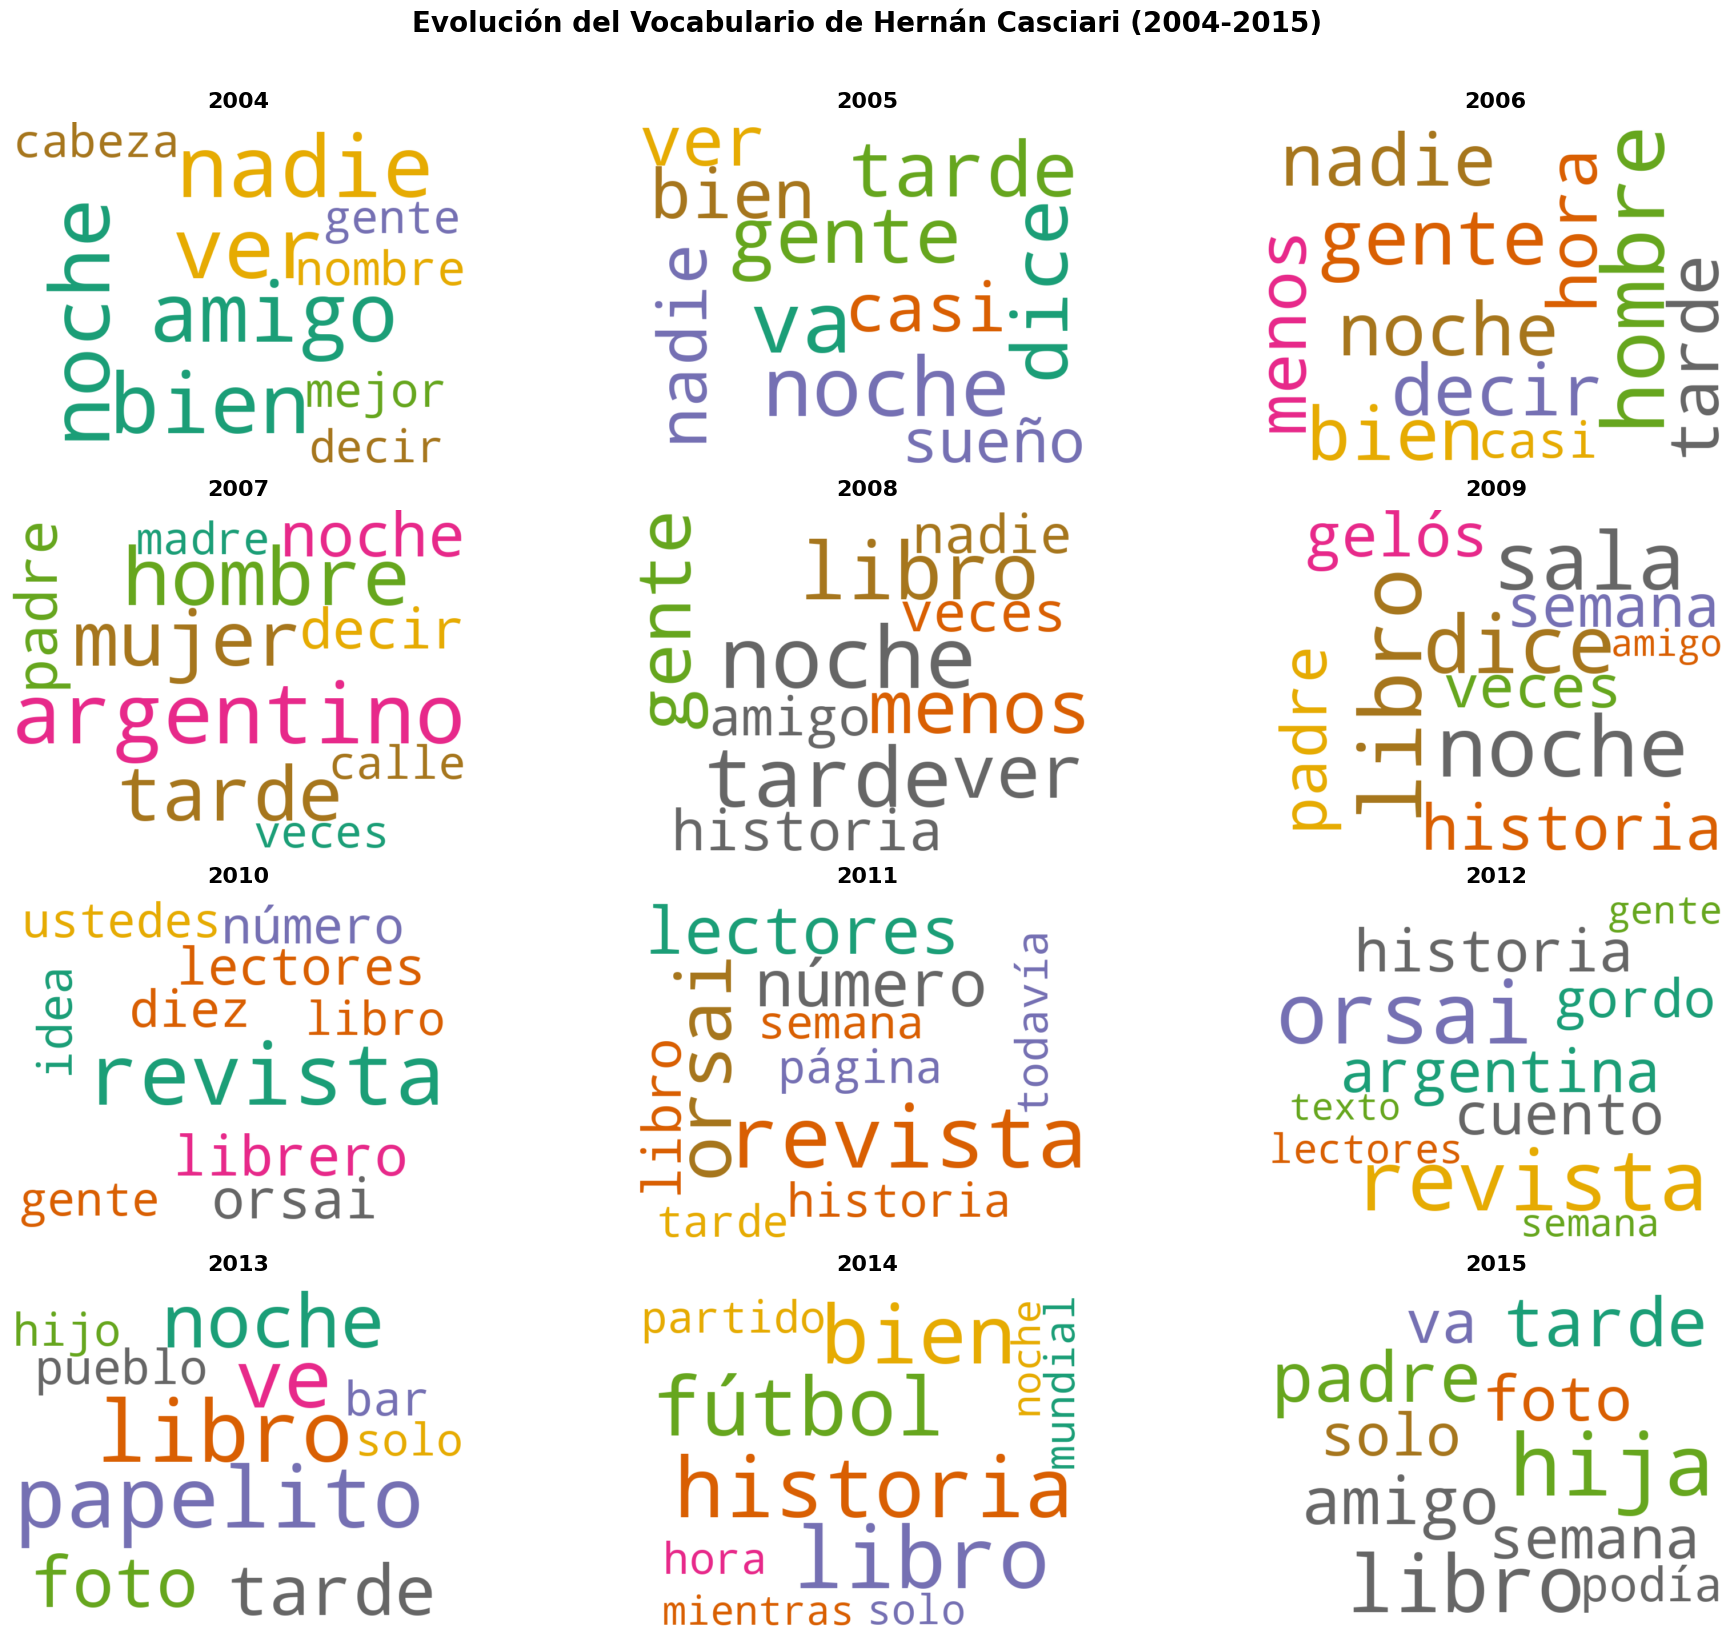

Nubes de palabras generadas exitosamente


In [ ]:
# Crear nubes de palabras para cada año
print("Generando nubes de palabras por año...")

# Configurar el tamaño de la figura
plt.figure(figsize=(20, 16))
plt.suptitle('Evolución del Vocabulario de Hernán Casciari (2004-2015)',
             fontsize=20, fontweight='bold', y=1.02) # Ajustar y para dar más espacio vertical al título

# Crear una nube para cada año
for i, anio in enumerate(anios):
    # Obtener el texto del año
    texto_anio = data_clean.transcript[anio]

    # Generar la nube de palabras
    nube_palabras = generador_wordcloud.generate(texto_anio)

    # Crear subplot
    plt.subplot(4, 3, i + 1)
    plt.imshow(nube_palabras, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{anio}', fontsize=16, fontweight='bold', pad=10)

# Ajustar espaciado
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

print("Nubes de palabras generadas exitosamente")

### Análisis de las Nubes de Palabras

**Observaciones clave que puedes notar:**

1. **Evolución temática**: ¿Cómo cambian las palabras principales a lo largo de los años?
2. **Temas recurrentes**: ¿Qué palabras aparecen consistentemente?
3. **Eventos específicos**: ¿Hay años con vocabulario muy particular?

**Contexto biográfico importante:**
- La hija de Casciari nació en 2004
- Observa cómo evoluciona la presencia de palabras familiares
- Su revista "Orsai" y su pasión por el fútbol son temas recurrentes

### Pregunta de Reflexión

**Observando las nubes de palabras:**
1. ¿Qué patrones temporales observas en el vocabulario de Casciari?
2. ¿Cómo crees que los eventos de su vida personal influyeron en su escritura?
3. ¿Qué temas parecen ser constantes en su obra?

---

## 8. Análisis Estadístico del Corpus

### Métricas de Diversidad Léxica

Vamos a calcular estadísticas que nos ayuden a entender mejor el corpus y la evolución del estilo de Casciari.

In [ ]:
# Datos adicionales sobre la estructura del corpus
# (Estos datos provienen del análisis original del blog)
posts_por_anio = [50, 27, 18, 50, 42, 22, 50, 33, 31, 17, 33, 13]

print("Información sobre la estructura del corpus:")
print("-" * 40)
for i, anio in enumerate(anios):
    print(f"{anio}: {posts_por_anio[i]} posts")

print(f"\nTotal de posts en el corpus: {sum(posts_por_anio)}")

Información sobre la estructura del corpus:
----------------------------------------
2004: 50 posts
2005: 27 posts
2006: 18 posts
2007: 50 posts
2008: 42 posts
2009: 22 posts
2010: 50 posts
2011: 33 posts
2012: 31 posts
2013: 17 posts
2014: 33 posts
2015: 13 posts

Total de posts en el corpus: 386


In [ ]:
# Calcular estadísticas detalladas por año
def calcular_estadisticas_corpus(data_bow_final, posts_por_anio):
    """
    Calcula estadísticas comprehensivas del corpus por año.

    Retorna:
    DataFrame con estadísticas por año
    """
    estadisticas = []

    for i, anio in enumerate(anios):
        # Obtener datos del año
        datos_anio = data_bow_final.loc[anio]

        # Calcular métricas
        palabras_unicas = (datos_anio > 0).sum()  # Número de palabras diferentes
        palabras_totales = datos_anio.sum()       # Número total de palabras
        posts_anio = posts_por_anio[i]
        promedio_palabras_por_post = palabras_totales / posts_anio
        diversidad_lexica = palabras_unicas / palabras_totales  # Ratio de diversidad

        # Palabra más frecuente
        palabra_top = datos_anio.idxmax()
        frecuencia_top = datos_anio.max()

        estadisticas.append({
            'Año': anio,
            'Posts': posts_anio,
            'Palabras_Unicas': palabras_unicas,
            'Palabras_Totales': palabras_totales,
            'Promedio_Palabras_Post': round(promedio_palabras_por_post, 1),
            'Diversidad_Lexica': round(diversidad_lexica, 4),
            'Palabra_Mas_Frecuente': palabra_top,
            'Frecuencia_Top': frecuencia_top
        })

    return pd.DataFrame(estadisticas)

# Calcular estadísticas
estadisticas_corpus = calcular_estadisticas_corpus(data_bow_final, posts_por_anio)

print("ESTADÍSTICAS DEL CORPUS POR AÑO")
print("=" * 50)
print(estadisticas_corpus.to_string(index=False))

ESTADÍSTICAS DEL CORPUS POR AÑO
 Año  Posts  Palabras_Unicas  Palabras_Totales  Promedio_Palabras_Post  Diversidad_Lexica Palabra_Mas_Frecuente  Frecuencia_Top
2004     50             4947             13008                   260.2             0.3803                 nadie              52
2005     27             6489             21762                   806.0             0.2982                  dice              83
2006     18             6018             17606                   978.1             0.3418                 gente              55
2007     50             5477             14732                   294.6             0.3718                 mujer              57
2008     42             6734             21900                   521.4             0.3075                 tarde              75
2009     22             2856              5775                   262.5             0.4945                  dice              21
2010     50             3879             10749                   215.0  

### Visualización de Estadísticas

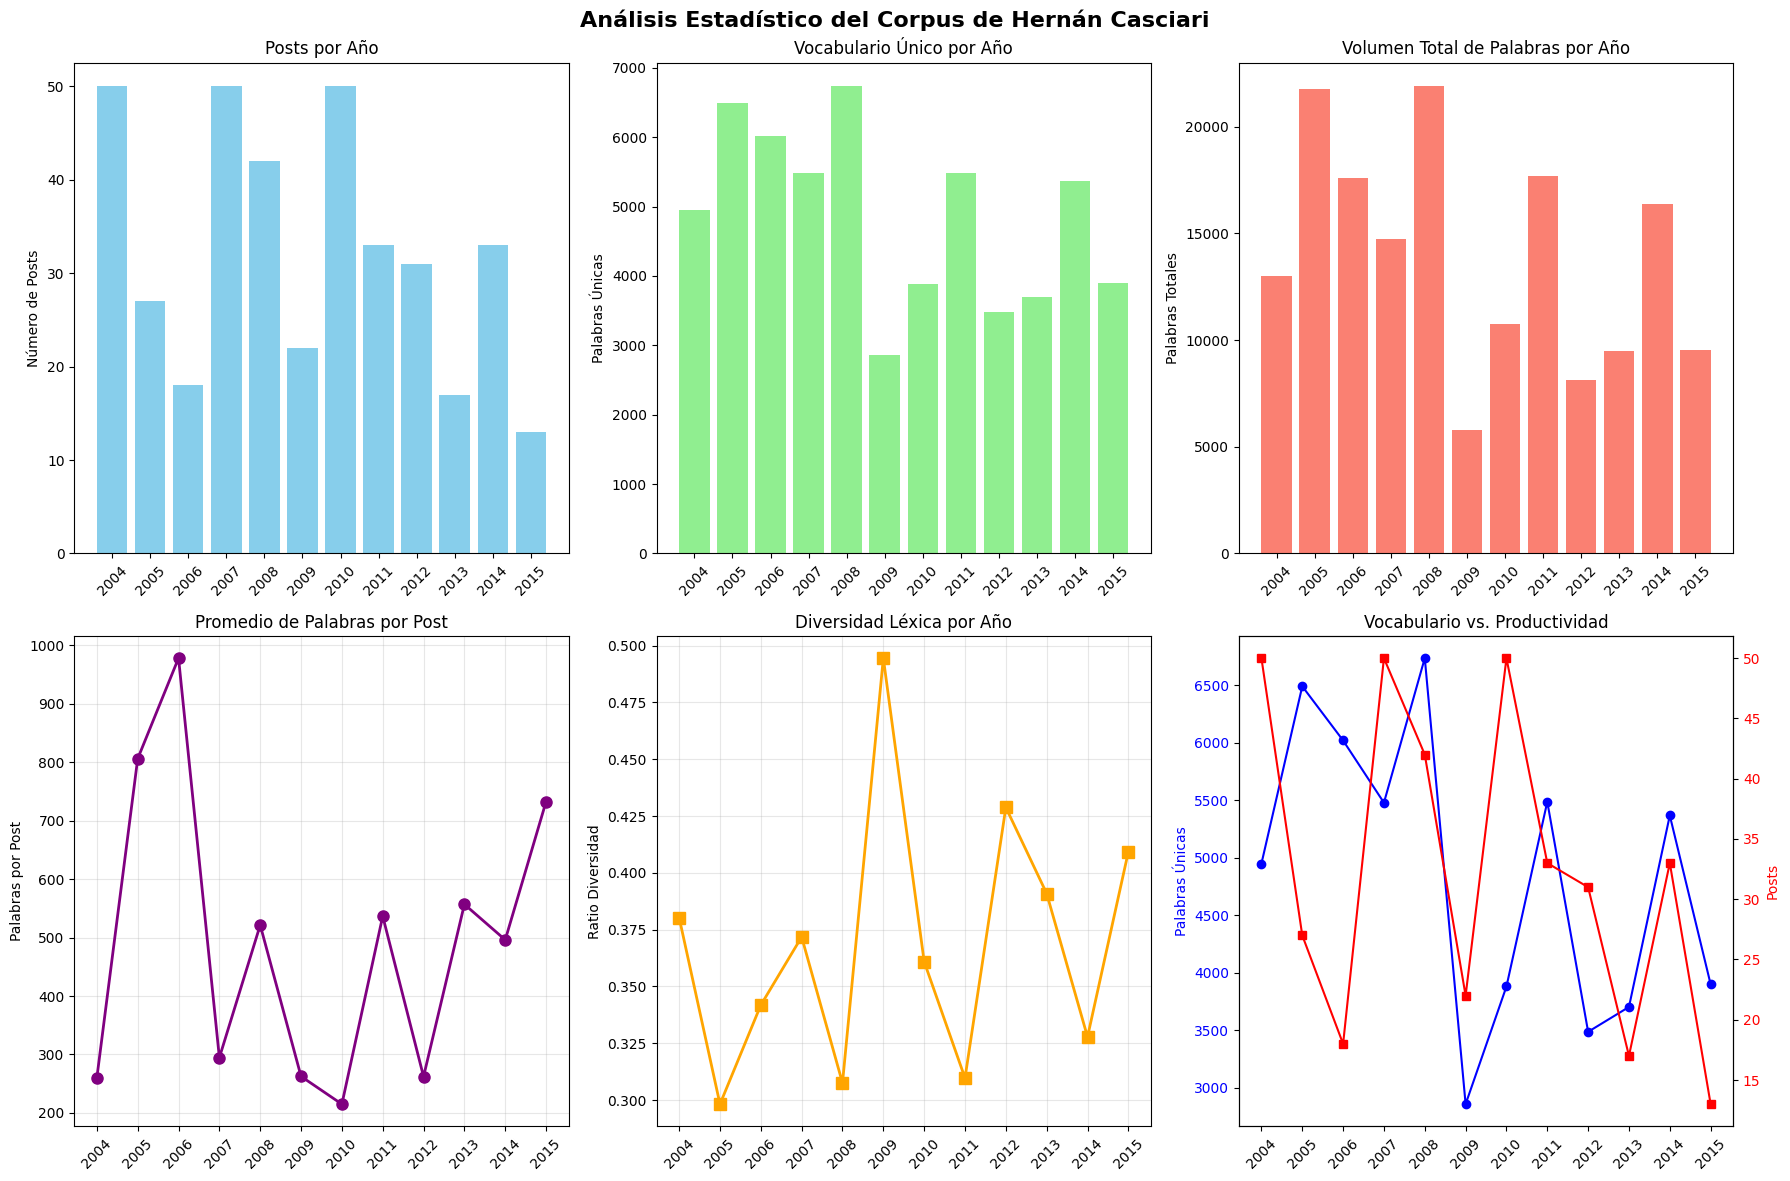

In [ ]:
# Crear visualización de las estadísticas principales
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Análisis Estadístico del Corpus de Hernán Casciari', fontsize=16, fontweight='bold')

# Gráfico 1: Número de posts por año
axes[0, 0].bar(estadisticas_corpus['Año'], estadisticas_corpus['Posts'], color='skyblue')
axes[0, 0].set_title('Posts por Año')
axes[0, 0].set_ylabel('Número de Posts')
axes[0, 0].tick_params(axis='x', rotation=45)

# Gráfico 2: Palabras únicas por año
axes[0, 1].bar(estadisticas_corpus['Año'], estadisticas_corpus['Palabras_Unicas'], color='lightgreen')
axes[0, 1].set_title('Vocabulario Único por Año')
axes[0, 1].set_ylabel('Palabras Únicas')
axes[0, 1].tick_params(axis='x', rotation=45)

# Gráfico 3: Palabras totales por año
axes[0, 2].bar(estadisticas_corpus['Año'], estadisticas_corpus['Palabras_Totales'], color='salmon')
axes[0, 2].set_title('Volumen Total de Palabras por Año')
axes[0, 2].set_ylabel('Palabras Totales')
axes[0, 2].tick_params(axis='x', rotation=45)

# Gráfico 4: Promedio de palabras por post
axes[1, 0].plot(estadisticas_corpus['Año'], estadisticas_corpus['Promedio_Palabras_Post'],
                marker='o', linewidth=2, markersize=8, color='purple')
axes[1, 0].set_title('Promedio de Palabras por Post')
axes[1, 0].set_ylabel('Palabras por Post')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# Gráfico 5: Diversidad léxica
axes[1, 1].plot(estadisticas_corpus['Año'], estadisticas_corpus['Diversidad_Lexica'],
                marker='s', linewidth=2, markersize=8, color='orange')
axes[1, 1].set_title('Diversidad Léxica por Año')
axes[1, 1].set_ylabel('Ratio Diversidad')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3)

# Gráfico 6: Comparativo temporal
ax2 = axes[1, 2].twinx()
line1 = axes[1, 2].plot(estadisticas_corpus['Año'], estadisticas_corpus['Palabras_Unicas'],
                        'b-o', label='Palabras Únicas')
line2 = ax2.plot(estadisticas_corpus['Año'], estadisticas_corpus['Posts'],
                 'r-s', label='Posts')
axes[1, 2].set_title('Vocabulario vs. Productividad')
axes[1, 2].set_ylabel('Palabras Únicas', color='b')
ax2.set_ylabel('Posts', color='r')
axes[1, 2].tick_params(axis='x', rotation=45)
axes[1, 2].tick_params(axis='y', labelcolor='b')
ax2.tick_params(axis='y', labelcolor='r')

plt.tight_layout()
plt.show()

### Análisis de Evolución Temporal

Vamos a analizar cómo evolucionan ciertas palabras clave a lo largo del tiempo:

In [ ]:
# Seleccionar palabras interesantes para el análisis temporal
palabras_interes = ['padre', 'madre', 'hija', 'casa', 'fútbol', 'libro', 'revista', 'orsai']

# Verificar qué palabras están en nuestro vocabulario
palabras_disponibles = [palabra for palabra in palabras_interes
                       if palabra in data_bow_final.columns]

print(f"Palabras disponibles para análisis temporal: {palabras_disponibles}")

# Crear DataFrame para análisis temporal
if palabras_disponibles:
    evolucion_temporal = pd.DataFrame(index=anios)

    for palabra in palabras_disponibles:
        evolucion_temporal[palabra] = data_bow_final[palabra].values

    print("\nEvolución temporal de palabras clave:")
    print(evolucion_temporal)
else:
    print("No se encontraron las palabras de interés en el vocabulario final.")
    print("Esto puede deberse a que fueron filtradas como stop words o son muy infrecuentes.")

Palabras disponibles para análisis temporal: ['padre', 'madre', 'hija', 'fútbol', 'libro', 'revista', 'orsai']

Evolución temporal de palabras clave:
      padre  madre  hija  fútbol  libro  revista  orsai
2004     25     16    16      10     10        3      8
2005     37     42    31      23     15        5     22
2006     20     26    11      12     10       15     10
2007     34     34    14      10     10       11     30
2008     33     41    17      25     50        6     23
2009     12      8     7       2     13        5      7
2010     15     11    11       6     19      163     69
2011     11     33     9       5     44      133    167
2012      2      9     5      16     10       51     78
2013     16     10     2       9     38       13     27
2014     19     18    28      53     30       10     46
2015     23     13    53       8     20        8      5


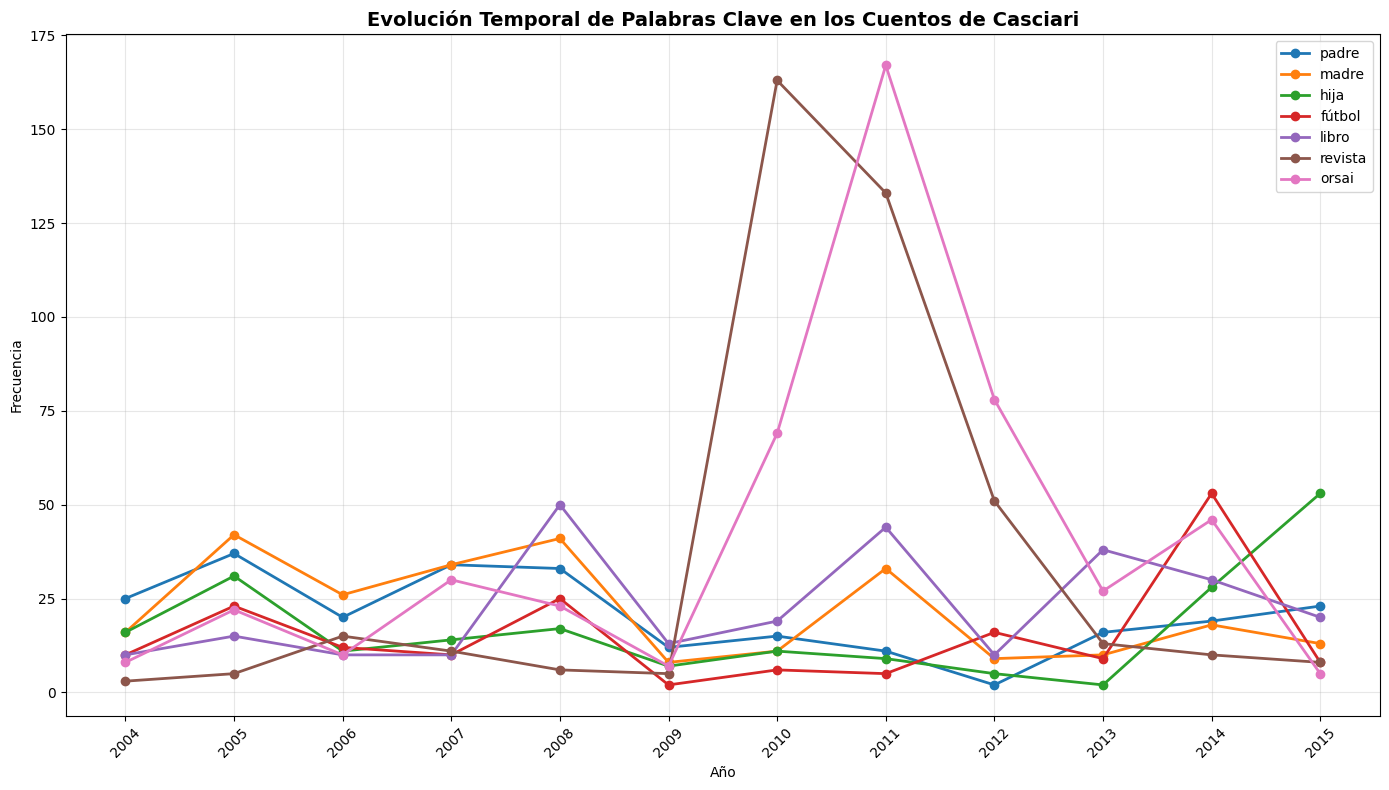

In [ ]:
# Si tenemos palabras disponibles, crear visualización temporal
if palabras_disponibles:
    plt.figure(figsize=(14, 8))

    for palabra in palabras_disponibles:
        plt.plot(evolucion_temporal.index, evolucion_temporal[palabra],
                marker='o', linewidth=2, label=palabra)

    plt.title('Evolución Temporal de Palabras Clave en los Cuentos de Casciari',
              fontsize=14, fontweight='bold')
    plt.xlabel('Año')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    # Buscar palabras alternativas en el vocabulario
    print("\nBuscando palabras familiares alternativas en el vocabulario...")
    vocabulario = list(data_bow_final.columns)

    # Buscar palabras que contengan ciertos términos
    palabras_familia = [p for p in vocabulario if any(term in p for term in ['padr', 'madr', 'hij', 'fami'])]
    palabras_escritura = [p for p in vocabulario if any(term in p for term in ['libro', 'escrib', 'text'])]

    print(f"Palabras relacionadas con familia: {palabras_familia[:10]}")
    print(f"Palabras relacionadas con escritura: {palabras_escritura[:10]}")

### Pregunta de Reflexión

**Analizando las estadísticas:**
1. ¿Qué años muestran mayor diversidad léxica? ¿A qué crees que se debe?
2. ¿Hay correlación entre el número de posts y la riqueza del vocabulario?
3. ¿Qué patrones temporales observas en el uso de palabras específicas?

---

## 9. Conclusiones y Reflexiones Finales

### Resumen del Proceso

En este laboratorio hemos completado un pipeline completo de **text mining**:

1. **Carga de datos**: Importamos 12 años de cuentos de Hernán Casciari
2. **Preprocesamiento**: Limpiamos el texto eliminando ruido
3. **Tokenización**: Dividimos el texto en palabras individuales
4. **Filtrado**: Eliminamos stop words generales y específicas del corpus
5. **Vectorización**: Convertimos texto a representación numérica (Bag of Words)
6. **Análisis**: Calculamos frecuencias y estadísticas temporales
7. **Visualización**: Creamos nubes de palabras y gráficos informativos

### Hallazgos Principal

**Evolución temática**: Los datos muestran cómo la escritura de Casciari refleja los cambios en su vida personal, especialmente relacionados con la paternidad y su carrera como escritor.

**Diversidad léxica**: Observamos variaciones en la riqueza del vocabulario que pueden relacionarse con diferentes períodos creativos y contextos vitales.

**Temas recurrentes**: Ciertos temas (familia, escritura, fútbol) aparecen consistentemente, definiendo la identidad literaria del autor.

### Limitaciones del Análisis

Es importante reconocer las limitaciones de nuestro approach:

1. **Bag of Words**: Perdemos información sobre el orden de las palabras y el contexto
2. **Stop words**: Eliminamos información que podría ser relevante para análisis estilísticos
3. **Frequency-based**: Solo consideramos frecuencia, no significado semántico
4. **Temporal aggregation**: Cada año se trata como un único documento

### Extensiones Posibles

Este análisis podría extenderse con:

- **TF-IDF**: Para identificar palabras más distintivas por período
- **N-gramas**: Para capturar frases y expresiones completas
- **Análisis de sentimientos**: Para entender la evolución emocional
- **Topic modeling**: Para identificar temas latentes automáticamente
- **Named Entity Recognition**: Para tracking sistemático de personas y lugares

### Pregunta Final de Reflexión

**Reflexiona sobre todo el proceso:**
1. ¿Qué insights más interesantes obtuviste sobre Hernán Casciari como escritor?
2. ¿Cómo podrías aplicar estas técnicas a otros corpus de texto?
3. ¿Qué aspectos del análisis te gustaría profundizar más?
4. ¿Qué preguntas nuevas surgieron que no pudimos responder con este análisis?

---

## Glosario de Términos

**Bag of Words (BoW)**: Modelo de representación de texto donde cada documento se representa como un vector de frecuencias de palabras, ignorando el orden y la estructura gramatical.

**Corpus**: Colección grande y estructurada de textos utilizados para análisis lingüístico o de procesamiento de lenguaje natural.

**CountVectorizer**: Herramienta de scikit-learn que convierte una colección de documentos de texto en una matriz de conteos de tokens.

**Diversidad Léxica**: Medida que indica la riqueza del vocabulario en un texto, calculada como la razón entre palabras únicas y palabras totales.

**Expresiones Regulares (Regex)**: Secuencias de caracteres que definen patrones de búsqueda, utilizadas para encontrar y manipular texto de manera flexible.

**Matriz Documento-Término**: Representación matemática donde las filas corresponden a documentos y las columnas a términos (palabras), con valores que indican la frecuencia de cada término en cada documento.

**Matriz Esparsa**: Estructura de datos que almacena eficientemente matrices con muchos valores cero, guardando solo los elementos no-cero y sus posiciones.

**NLTK (Natural Language Toolkit)**: Biblioteca de Python que proporciona herramientas para trabajar con datos de lenguaje humano, incluyendo tokenización, parsing y clasificación.

**Preprocesamiento de Texto**: Conjunto de técnicas para limpiar y normalizar texto antes del análisis, incluyendo eliminación de puntuación, conversión a minúsculas, y remoción de caracteres especiales.

**Serialización (Pickling)**: Proceso de convertir objetos Python en un formato que puede ser almacenado en disco y posteriormente recuperado (deserializado).

**Stop Words**: Palabras muy frecuentes en un idioma que típicamente se filtran en análisis de texto por aportar poco contenido semántico (ej: "el", "de", "y").

**Text Mining (Minería de Texto)**: Proceso de extraer información útil y patrones de grandes volúmenes de texto no estructurado mediante técnicas computacionales.

**Token**: Unidad básica de texto después de la segmentación, típicamente una palabra o símbolo individual.

**Tokenización**: Proceso de dividir texto en unidades más pequeñas (tokens), generalmente palabras, para su posterior análisis.

**Vectorización**: Proceso de convertir texto en representaciones numéricas (vectores) que pueden ser procesadas por algoritmos de machine learning.

**Vocabulario**: Conjunto de todas las palabras únicas presentes en un corpus de texto.

**Word Cloud (Nube de Palabras)**: Visualización donde las palabras se muestran con tamaños proporcionales a su frecuencia, permitiendo identificar rápidamente los términos más importantes en un texto.

---

*Fin del Laboratorio de Text Mining*